# Part 1- Landslide dataset Analysis

## Project by Ajitesh Pandey under guidance of Professor Dr.Ritesh Kumar

### In this part of our project we will be seeing what all features influence landslides in Uttarakhand and how their Distribution looks like

In [1]:
# Importing various libraries
import numpy as np
import pandas as pd
import seaborn as sns
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [2]:
# Import Data
df = pd.read_csv('Landslide_Dataset - Sheet1 (1).csv')

In [3]:
df.head()

,District,Longitude,Latitude,Depth of a Land3,Activity,Trigger and reason,Length,Width,Height,Material,Movement,Hydrological,Landuse,Geoscientific reason,Landslide volume,Landslide predictability,Cummulative Rainfall,Rainfall Intensity
0,Pithoragarh,80.32028,30.00917,0,1,2,20,30,20,1,3,1,6,1,0,20,40.0,0.25
1,Pithoragarh,80.31500,29.97778,25,2,1,150,700,150,3,2,4,2,1,200000,100,133.5,0.46
2,Pithoragarh,80.31222,29.96972,0,1,2,40,70,40,6,3,1,2,1,0,70,70.0,0.40
3,Pithoragarh,80.31389,29.96500,3,1,2,40,10,40,3,2,4,2,1,1000,60,55.0,0.30
4,Pithoragarh,80.30472,29.95833,8,1,3,25,35,25,3,4,6,3,1,3000,40,45.0,0.50


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   District                  99 non-null     object 
 1   Longitude                 99 non-null     float64
 2   Latitude                  99 non-null     float64
 3   Depth of a Land3          99 non-null     int64  
 4   Activity                  99 non-null     int64  
 5   Trigger and reason        99 non-null     int64  
 6   Length                    99 non-null     int64  
 7   Width                     99 non-null     int64  
 8   Height                    99 non-null     int64  
 9   Material                  99 non-null     int64  
 10  Movement                  99 non-null     int64  
 11  Hydrological              99 non-null     int64  
 12  Landuse                   99 non-null     int64  
 13  Geoscientific reason      99 non-null     int64  
 14  Landslide vo

## Main causes of Landslide Trigger

### 1-Continous Rainfall
### 2-FLooding of RIver
### 3-Heavy Rainfall
### 4-Anthrapogenic activity such as road cutting
### 5-Steep Slope with toe erosion by high river current
### 6-Cloud Burst

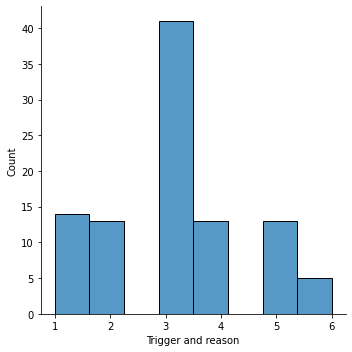

In [8]:
sns.displot(df['Trigger and reason'])

<AxesSubplot:xlabel='Trigger and reason', ylabel='Landslide predictability'>

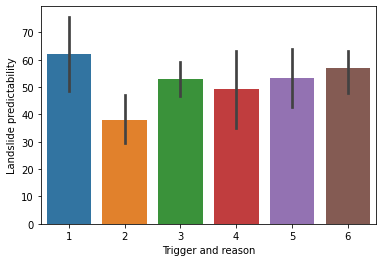

In [9]:
sns.barplot(x=df['Trigger and reason'],y=df['Landslide predictability'])

### So we see that heavy rainfall has the highest count but landslide occuring probability is highest in case of Continous rainfall.

## Now we will see the influence of Soil type and Material

### 1-Debris
### 2-Rock
### 3-Rock cum Debris
### 4-Debris cum Earth
### 5-Earth cum Debris
### 6-Earth

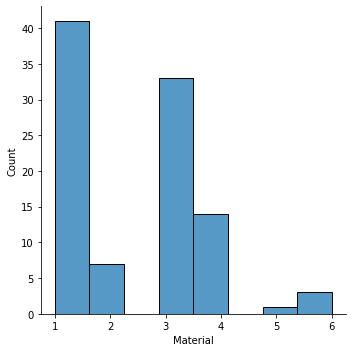

In [10]:
sns.displot(df['Material'])

<AxesSubplot:xlabel='Material', ylabel='Landslide predictability'>

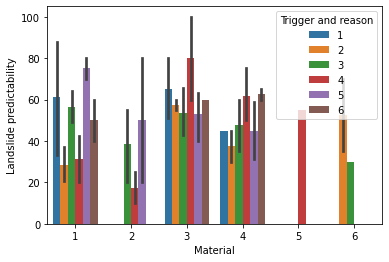

In [11]:
sns.barplot(x=df['Material'],y=df['Landslide predictability'],hue=df['Trigger and reason'])

### So we see that debris forms the major portion of soil cover followed by rock cum debris.We see in case of Debris Continous rainfall and Steep slope are primary trigger reasons of Landslides.

## Now we will see whether the particular location is active,reactivated site or a dormant one.

### 1-Active
### 2-Reactivated
### 3-Dormant


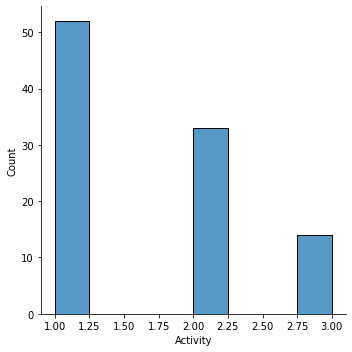

In [12]:
sns.displot(df['Activity'])

<AxesSubplot:xlabel='Activity', ylabel='Landslide predictability'>

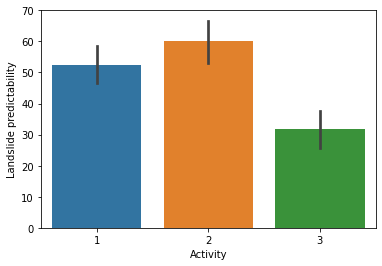

In [15]:
sns.barplot(x=df['Activity'],y=df['Landslide predictability'])

### So we conclude most of sites where Landslide has taken place are still while some have reactivated over a period of time.In both these sites occuring of Landslide predictability is much more than dormant region as shown by above graph.

## Now we will see the distribution of Geoscientific reason behinf the occurunce of previous landslide 
### 1- Presence of Loose and Unconsilated Material
### 2- Toe erosion fue to flooding and reduction in shear strength
### 3- Detachment of planes/wedge failure due to intersection of prominent joints
### 4- Heavy rainfall causing saturation of slope and reduction in shear stress

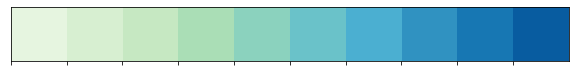

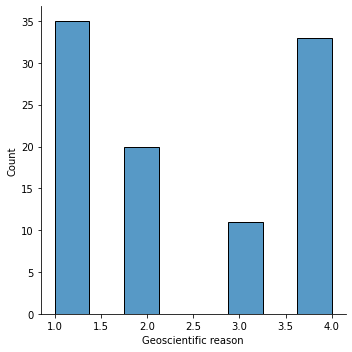

In [16]:
sns.palplot(sns.color_palette("GnBu", 10))
sns.displot(df['Geoscientific reason'])

<AxesSubplot:xlabel='Geoscientific reason', ylabel='Landslide predictability'>

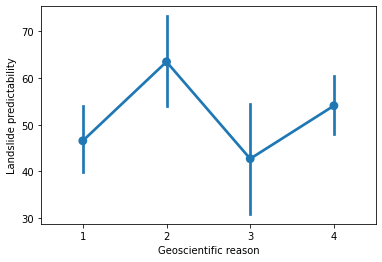

In [19]:
sns.pointplot(x=df['Geoscientific reason'],y=df['Landslide predictability'],)

<AxesSubplot:xlabel='Geoscientific reason', ylabel='Landslide predictability'>

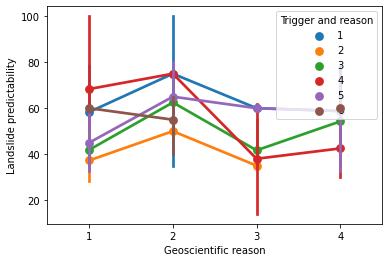

In [21]:
sns.pointplot(x=df['Geoscientific reason'],y=df['Landslide predictability'],hue=df['Trigger and reason'])

### So we see presence of loose and unconsolidated material is the main reason but near the toe of rivers erosion due to landslide has the most probability.

## Now we will analyse the type of land Movements that occur and which of them are more dominant
### 1-Fall and Slide
### 2-Fall and Flow
### 3-Slide
### 4-Fall
### 5-Subsidence
### 6-Flow
### 7-Spread and Topple

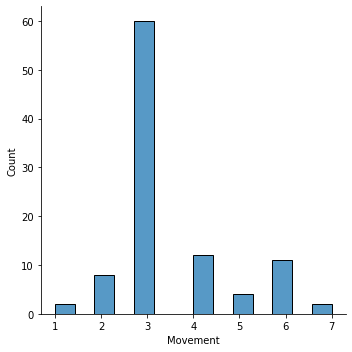

In [22]:
sns.displot(df['Movement'])

Text(0, 0.5, 'Geoscientific reason')

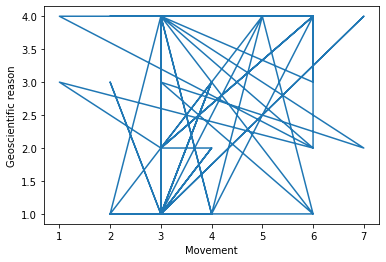

In [26]:
import matplotlib.pyplot as plt
plt.plot(df['Movement'],df['Geoscientific reason'])
plt.xlabel('Movement')
plt.ylabel('Geoscientific reason')

### So we see that slides are the most common followed by falls.

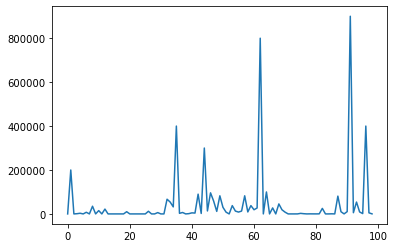

In [27]:
plt.plot(df['Landslide volume'])


## We see that most of the landslides which occured had value less in the range of 1000-10000 but there were some severe ones also with exceedingly high values

## Lets understand the cummulative rainfall distribution law

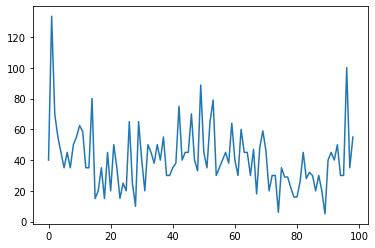

In [28]:
plt.plot(df['Cummulative Rainfall'])

Text(0, 0.5, 'Landslide predictability')

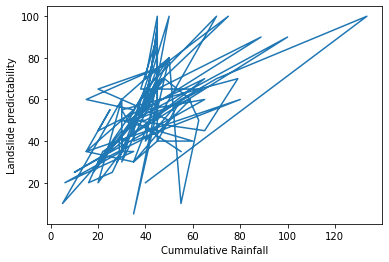

In [29]:
plt.plot(df['Cummulative Rainfall'],df['Landslide predictability'])
plt.xlabel('Cummulative Rainfall')
plt.ylabel('Landslide predictability')

### The above graph conveys us two information-When cummulative rainfall tis greater than 70 mm there are more than 60 percent chances of a Landslide occuring and when it is less than 30 mm there are less than 20 percent chance of Landslide occuring with some exceptions .in mid range there is a lot of uncertainity and Intensity would play a deciding role.

## Now we analyse the last feature of our Dataset  -Rainfall Intensity which is one of the most important one as well.

Text(0, 0.5, 'Landslide predictability')

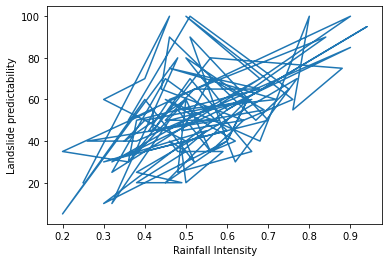

In [30]:
plt.plot(df['Rainfall Intensity'],df['Landslide predictability'])
plt.xlabel('Rainfall Intensity')
plt.ylabel('Landslide predictability')

<AxesSubplot:xlabel='Rainfall Intensity', ylabel='Landslide predictability'>

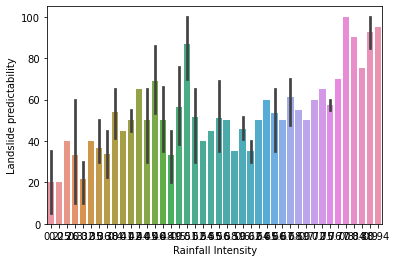

In [31]:
sns.barplot(x=df['Rainfall Intensity'],y=df['Landslide predictability'])

<AxesSubplot:xlabel='Rainfall Intensity', ylabel='Trigger and reason'>

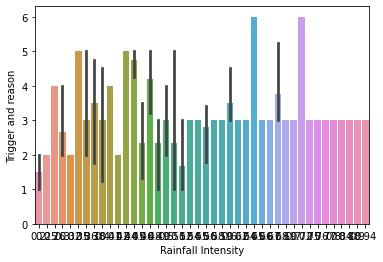

In [34]:
sns.barplot(x=df['Rainfall Intensity'],y=df['Trigger and reason'])

<AxesSubplot:xlabel='Trigger and reason', ylabel='Rainfall Intensity'>

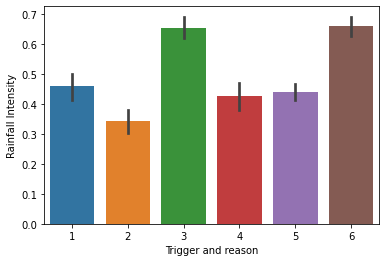

In [35]:
sns.barplot(x=df['Trigger and reason'],y=df['Rainfall Intensity'])

## So from above graphs we conclude that when heavy rainfall or cloud bursts were Landslide Triggers then intensity was more than 0.55


<AxesSubplot:xlabel='Trigger and reason', ylabel='Cummulative Rainfall'>

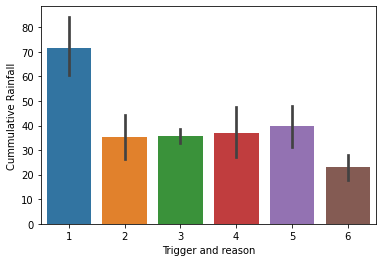

In [36]:
sns.barplot(x=df['Trigger and reason'],y=df['Cummulative Rainfall'])